In [1]:
import operator
from datetime import datetime

import pyfolio as pf
import pandas as pd

from ljwtrader.strategy import XDayHigh
from ljwtrader.system import TradingSystem
from ljwtrader.data import Backtest

/Users/leowotzak/PyProjects/LJWEquities/venv/lib/python3.9/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
strat = XDayHigh('AAPL', 10, operator.lt, 130.0)
back = Backtest()
sys = TradingSystem()
sys.add_position(('AAPL', [strat]), 'long')
res = sys.run_backtest(back)

In [3]:
from dotenv import load_dotenv
import os
from alpha_vantage.timeseries import TimeSeries

load_dotenv()
ts = TimeSeries(key=os.environ.get('AV_API_KEY'), output_format='pandas')

data, metadata = ts.get_daily_adjusted(symbol='AAPL',
                                           outputsize='full')


In [7]:
rets = data['5. adjusted close'].pct_change().dropna().sort_index()
rets

Start date,1999-11-01
End date,2021-09-09
Total months,261
,Backtest
Annual return,-22.4%
Cumulative returns,-99.6%
Annual volatility,45.3%
Sharpe ratio,-0.36
Calmar ratio,-0.22
Stability,0.94
Max drawdown,-99.9%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,99.87,2003-04-16,2021-09-03,NaT,NaN
1,47.35,2000-12-18,2001-05-01,2002-08-02,425
2,44.34,1999-11-01,2000-03-21,2000-09-28,239
3,21.02,2002-10-08,2002-11-05,2003-04-10,133
4,17.08,2000-10-25,2000-11-01,2000-11-16,17


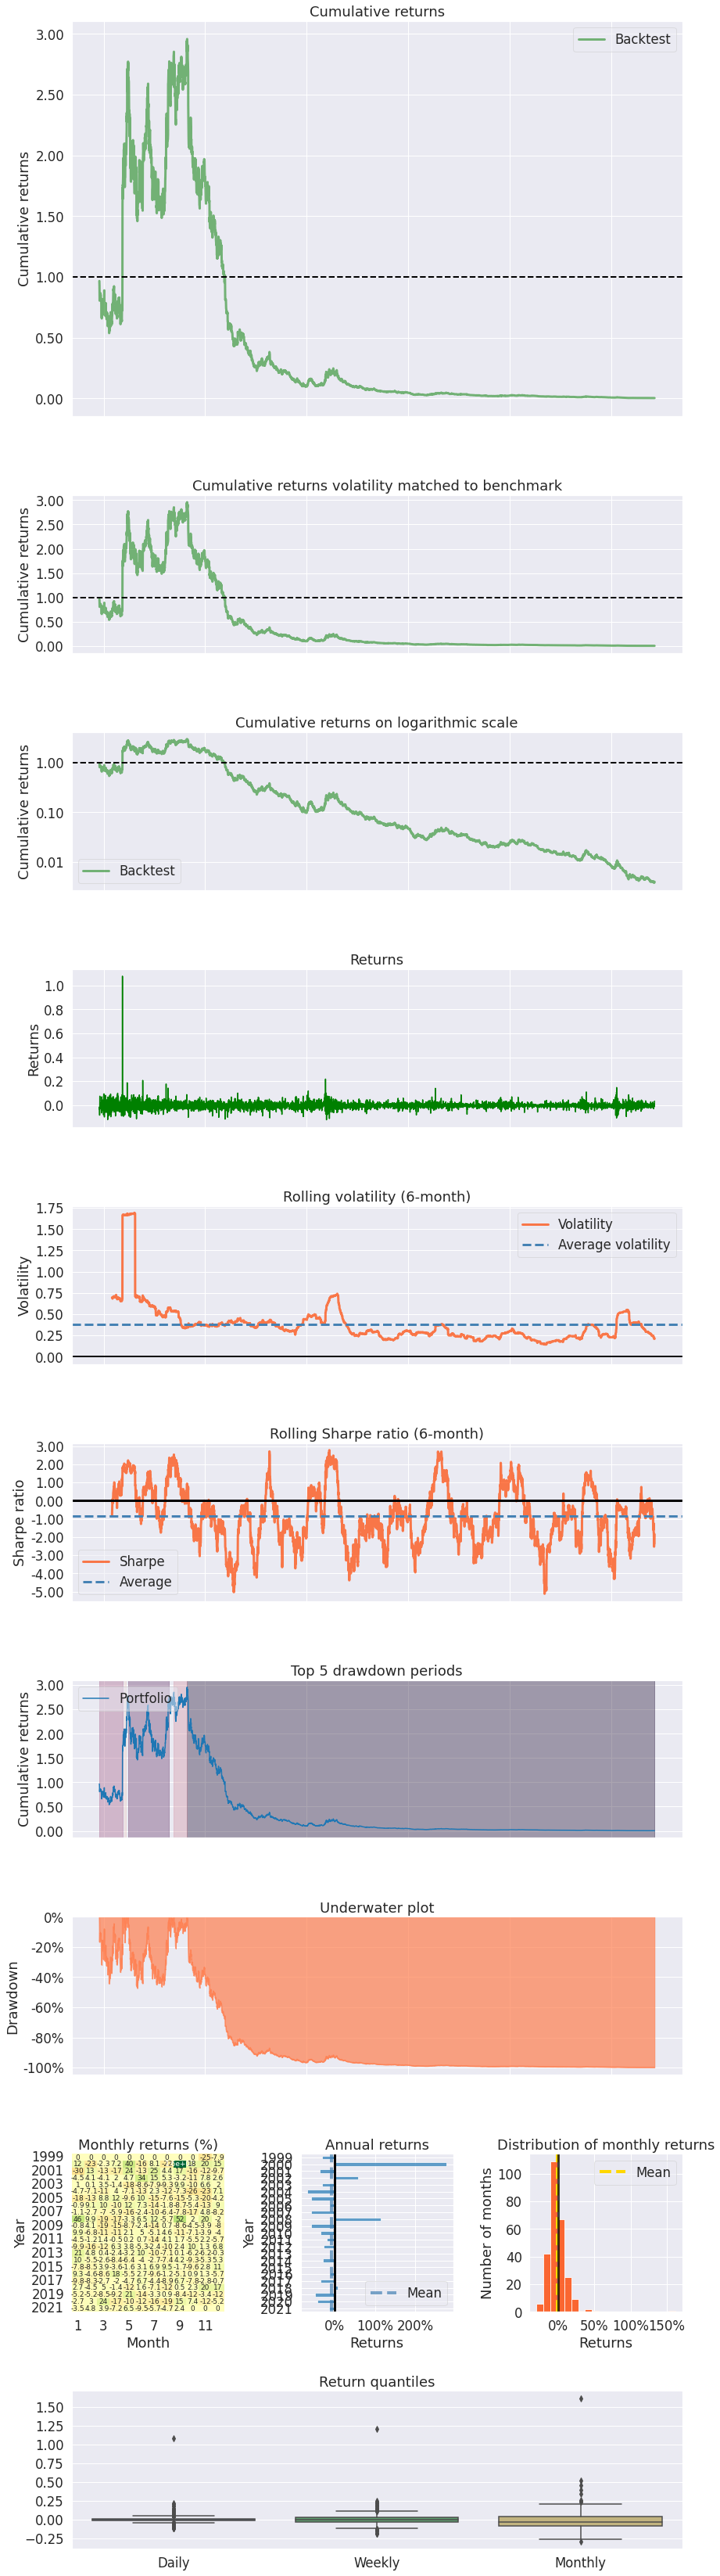

In [16]:
pf.create_returns_tear_sheet(rets)